Importing the essential libraries:

In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import neattext.functions as nfx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

Importing the cleaned dataset:

In [41]:
import os
dir = os.getcwd()
os.chdir("..")

cleaned_train = pd.read_csv("datasets/clean_train.csv")
os.chdir(dir)

View the cleaned dataset to ensure that the imported dataset is correct:

In [42]:
cleaned_train.head()

,Unnamed: 0,text,emotion,clean_text
0,0,i didnt feel humiliated,sadness,didnt feel humiliated
1,1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,4,i am feeling grouchy,anger,feeling grouchy


We start the EDA process by viewing the most commonly used words using WordCLoud:

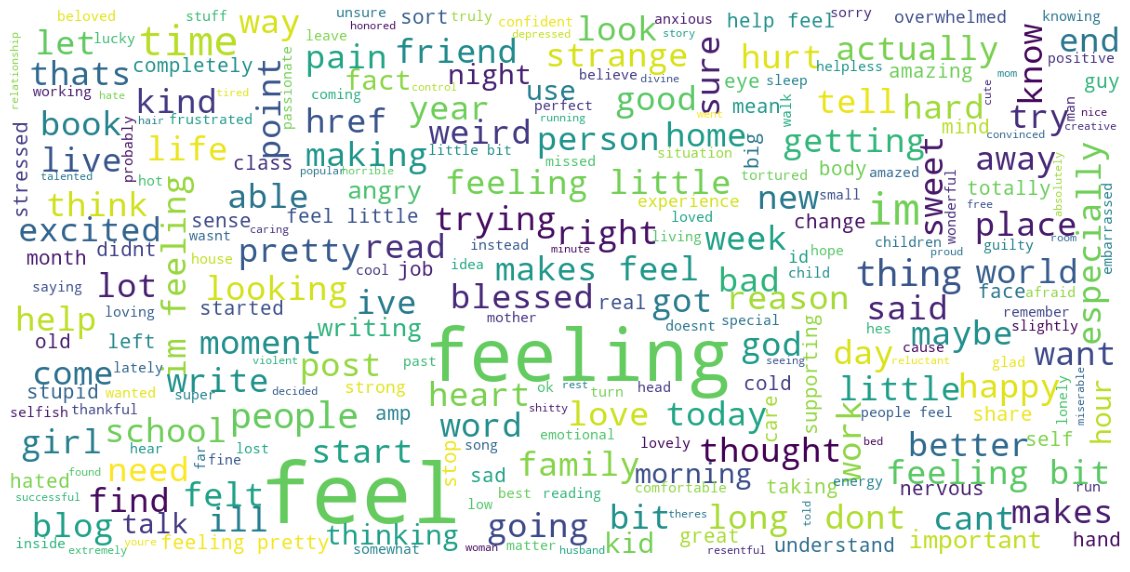

In [43]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data, column, bg, max_words, max_font_size, scale, figsize):

    stopwords = set(STOPWORDS)
    text = "".join(t for t in data[column])
    def display():
        wordcloud = WordCloud(
            background_color = bg,
            stopwords = stopwords,
            max_words = max_words,
            max_font_size = max_font_size,
            scale = scale,
            random_state = 1)
    
        wordcloud = wordcloud.generate(str(text))

        fig = plt.figure(1, figsize = figsize)
        plt.axis('off')

        plt.imshow(wordcloud)
        plt.show()

    display()

show_wordcloud(cleaned_train, 'clean_text', 'white', 500, 30, 3, (20, 20))

We can further attempt to check if there is any word in a sentence of the dataset that is extra-ordinary long (indication of potential typo, or spam sentence).

C:\Users\juinl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

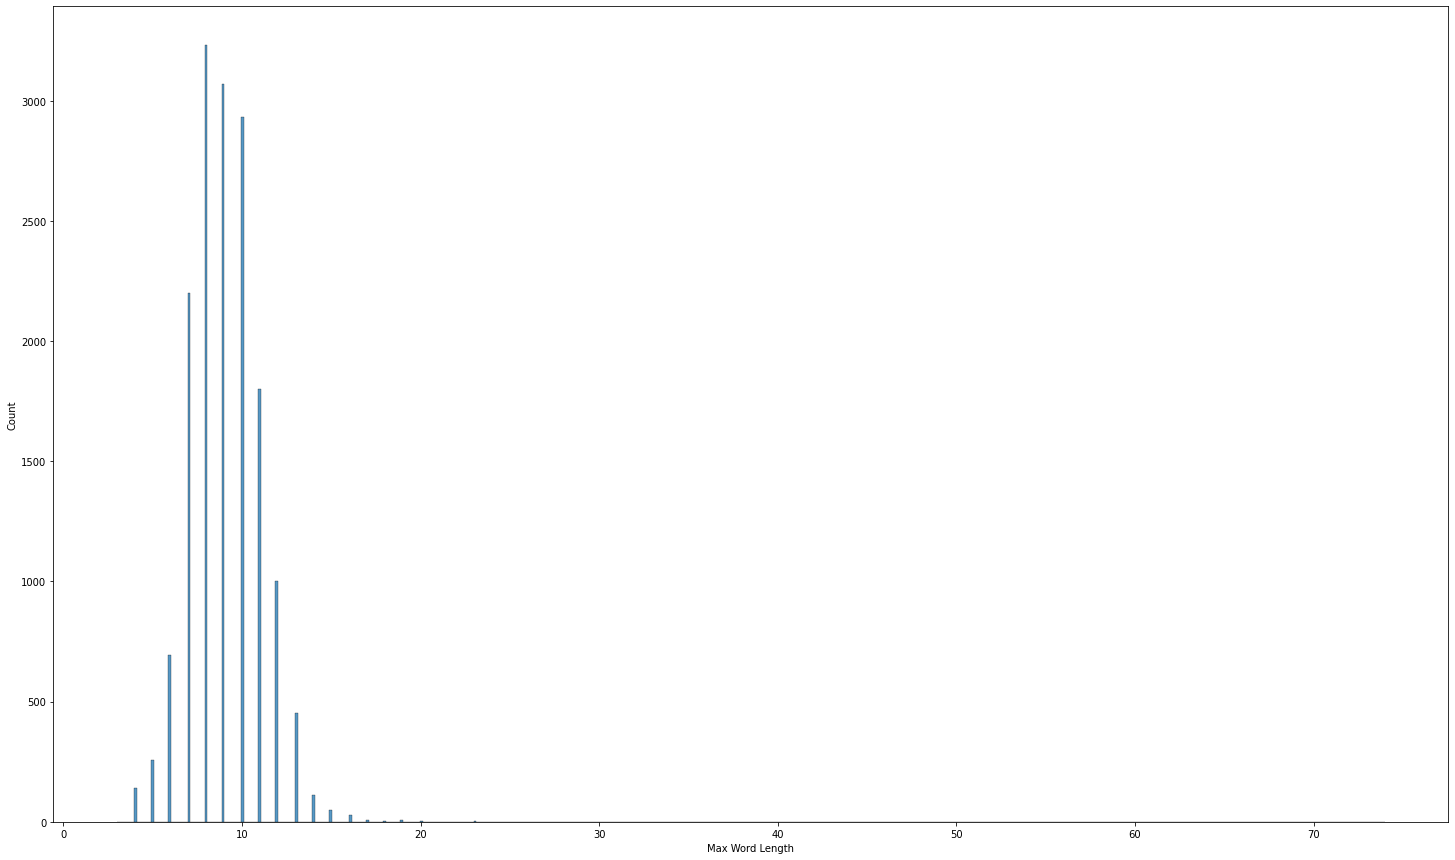

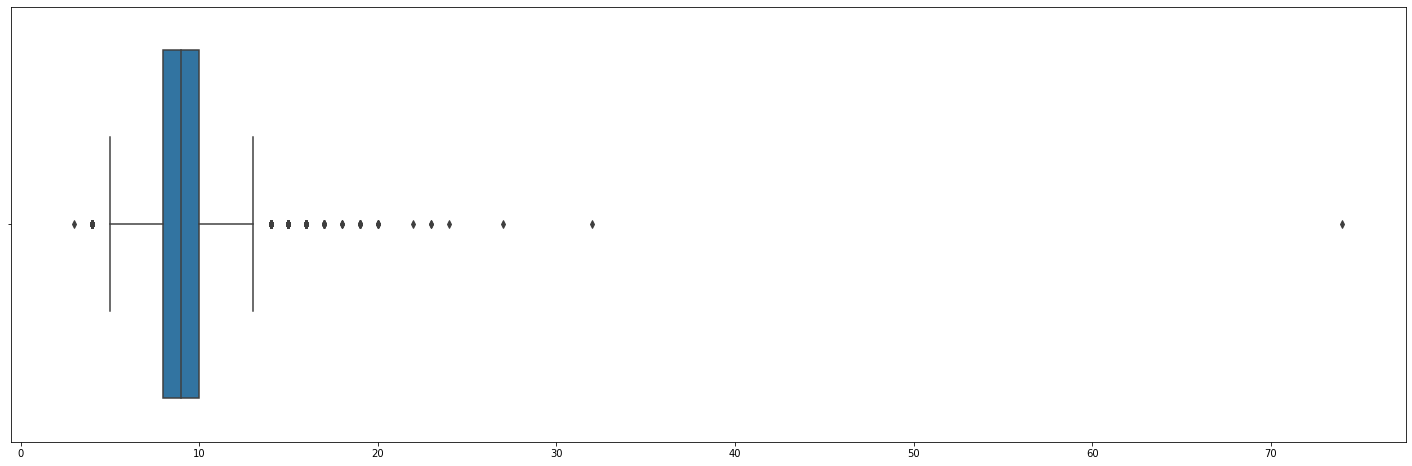

In [62]:
max_length_list = []
for sentence in cleaned_train['clean_text']:
    sentence = sentence.split()
    max_word_length = 0
    for word in sentence:
        word_length = 0
        for char in word:
            word_length += 1
        if word_length > max_word_length:
            max_word_length = word_length
    max_length_list.append(max_word_length)

f = plt.figure(figsize = (25, 15))
plt.xlabel('Max Word Length')
plt.ylabel('Count')
sb.histplot(max_length_list)

f = plt.figure(figsize = (25, 8))
sb.boxplot(max_length_list)

From the above boxplot, we see that there are a few outlier words in the range of **10 - 20 up to 30 - 40 characters long**. Though rare, these words should still be considered as legitimate words. However, the longest word in the English dictionary is **45 characters long**, indicating that the single outlier with the character count in the range of 70+ is definitely **not a legitimate English word**.

There is another implication here, though the 70+ character long word can be considered as illegitimate English word, it may still **contain relevant meaning** in the context of emotion, i.e., it could be a spam of characters to **express frustration**, a spam of characters to **express excitement**, etc. Furthermore, since there is only one such illegitimate English word, its **impact on the fitting of model will be insignficant**. Thus, we decided to **not remove this outlier**.